# KMeans Numpy implementation

## Introduction

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group

## Algorithm

1. Choosing the number of clusters 
The first step is to define the K number of clusters in which we will group the data.

2. Initializing centroids
Centroid is the center of a cluster but initially, the exact center of data points will be unknown so, we select random data points and define them as centroids for each cluster.

3. Assign data points to the nearest cluster
Now that centroids are initialized, the next step is to assign data points Xn to their closest cluster centroid Ck

4. Re-initialize centroids 
Next, we will re-initialize the centroids by calculating the average of all data points of that cluster.

5. Repeat steps 3 and 4
We will keep repeating steps 3 and 4 until we have optimal centroids and the assignments of data points to correct clusters are not changing anymore.

(for more informations, visit https://neptune.ai/blog/k-means-clustering)

## Initialization strategies

**Random data points**

This is the traditional approach of initializing centroids where K random data points are selected and defined as centroids. This is a time-consuming process; with increased dataset complexity the number of steps to achieve the correct centroid or correct cluster will also increase. This approach may leads to a poor clustering.

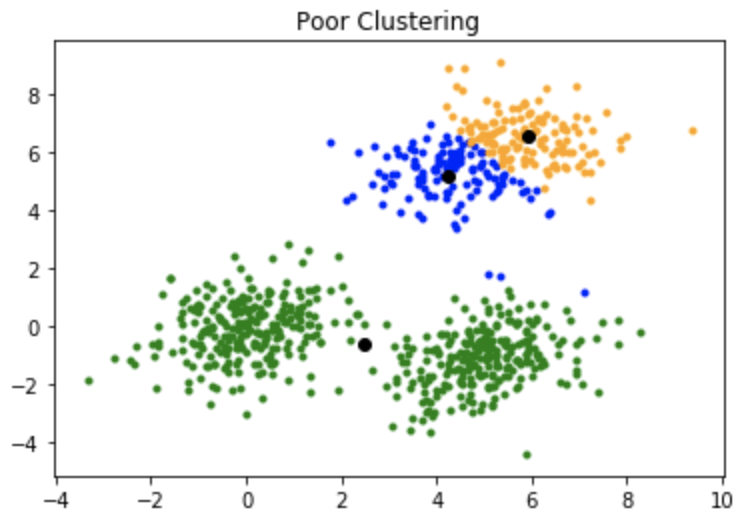

**K-Means++**

K-means++ is the most optimized centroid initialization method for the K-mean algorithm. The goal is to spread out the initial centroid by assigning the first centroid randomly then selecting the rest of the centroids based on the maximum squared distance. The idea is to push the centroids as far as possible from one another.

1. Choose one center uniformly at random among the data points.
2. For each data point x not chosen yet, compute D(x), the distance between x and the nearest center that has already been chosen.
3. Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)\**2.
4. Repeat Steps 2 and 3 until k centers have been chosen.

(for more informations about the probability computing, see https://en.wikipedia.org/wiki/Probability-proportional-to-size_sampling)

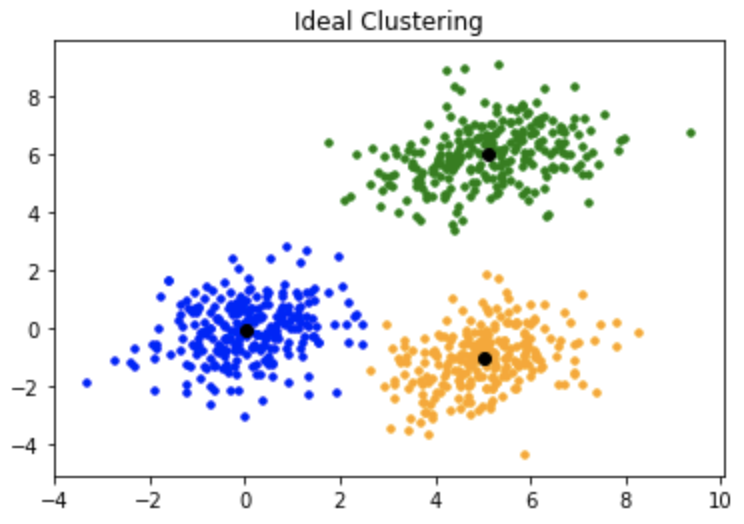

## Choosing the right K

**Elbow method**

Work in progress...

**Silhouette method**

Work in progress...

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [17]:
class KMeans:
    
    def __init__(self, n_clusters=3, max_iter=300, tolerance=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tolerance = tolerance
        
    def _random_initialization(self, X):
        """Random initialization strategy"""
        return np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.n_clusters, X.shape[1]))
        
    def _plus_plus_initialization(self, X):
        """KMeans++ initialization strategy"""
        centroids = [X[np.random.choice(X.shape[0])]]

        for _ in range(1, self.n_clusters):

            # Compute the distance between all set points and selected centroids
            distances = np.sum((X[:, np.newaxis, :] - centroids)**2, axis=2)
            
            # Only keep the closest centroid distance for each points
            minimums = np.min(distances, axis=1)
            
            # Create probability according to the KMeans++ algorithm
            probabilities = minimums / minimums.sum()

            # Select the next centroid with proportionnals probabilities
            next_centroid = X[np.random.choice(X.shape[0], p=probabilities)]
            
            centroids.append(next_centroid)

        return np.array(centroids)
        
    def fit(self, X):
        
        # Initialize distances array
        distances = np.zeros([X.shape[0], self.n_clusters], dtype=np.float64)
        
        # Initialize centroids
        centroids = self._plus_plus_initialization(X)
        
        for _ in range(self.max_iter):
                        
            # Compute the euclidean distance between all points and each centroids            
            for i in range(self.n_clusters):
                distances[:, i] = np.sqrt(np.sum((X - centroids[i])**2, axis=1))
            
            # Assign each points to its cluster
            clusters = np.argmin(distances, axis=1)
            
            new_centroids = [0] * self.n_clusters
            
            # Compute new centroids coordinates from the mean of all their respective points
            for i in range(self.n_clusters):
                
                # Get a mask of a given cluster
                mask = (clusters == i)
                
                # Compute new centroids using the mask for each cluster
                new_centroids[i] = np.mean(X[mask], axis=0) if np.any(mask) else centroids[i]
           
            # Compute the difference ratio between old and new centroids
            difference = np.sum(np.abs(centroids - new_centroids))
            
            # Stop iterations if we consider that the difference is not significant
            if difference < self.tolerance:
                break
                
            # Assign new centroids
            centroids = np.array(new_centroids)
    
        return clusters, centroids

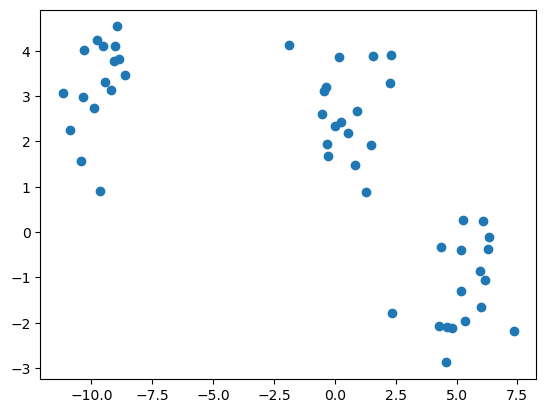

In [10]:
# Generate random samples
X, y = make_blobs(n_samples=50, n_features=2, centers=3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

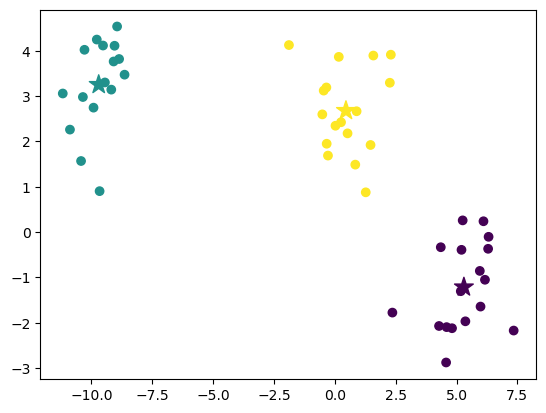

In [29]:
kmeans = KMeans(n_clusters=3)
clusters, centroids = kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c=range(len(centroids)), marker="*", s=200)
plt.show()